### Задача 1:
На отрезке [2; 3] найти минимальное значение функции F(a).
$$F(a) = \int_{1}^{2} K_0(\alpha x) K_1(x/\alpha) \,dx$$

### Решение на языке Python:

In [9]:
from scipy.integrate import quad
from scipy.special import kn
from scipy.optimize import minimize

def F(a):
    return quad(lambda x: kn(0, a*x) * kn(1, x/a), 1, 2)[0]


initial_x = 2
a = 3

result = minimize(F, initial_x, bounds=[(2, 3)], method='slsqp')
min_F = result.fun
min_a = result.x[0]

print(f"Минимальное значение функции F(a) на отрезке [2, 3]: {min_F}")
print(f"Значение параметра а, при котором достигается минимум: {min_a}")


Минимальное значение функции F(a) на отрезке [2, 3]: 0.02103649861478081
Значение параметра а, при котором достигается минимум: 3.0


### Задача 2:

Решить на отрезке [0,2] дифференциальное уравнение третьего порядка, приведя его к системе уравнений первого порядка. Вывести график решения.  
$$y'''+y''+y'-2y=0$$
$$y(0)=0, \quad y'(0)=y''(0)=1$$

### Решение:
Для начала необходимо привести данное дифференциальное уравнение 3-го порядка к системе уравнений 1-го порядка.  
Положим, что
\begin{cases}
    y_1=y\\
    y_2=y'\\
    y_3=y''
\end{cases}

Тогда наше дифференциальное уравнение примет следующий вид:
\begin{cases}
    y_1'=y_2\\
    y_2'=y_3\\
    y_3'=2y-y_3-y_2
\end{cases}

### Реализация дальнейшнего решения на языке Python:

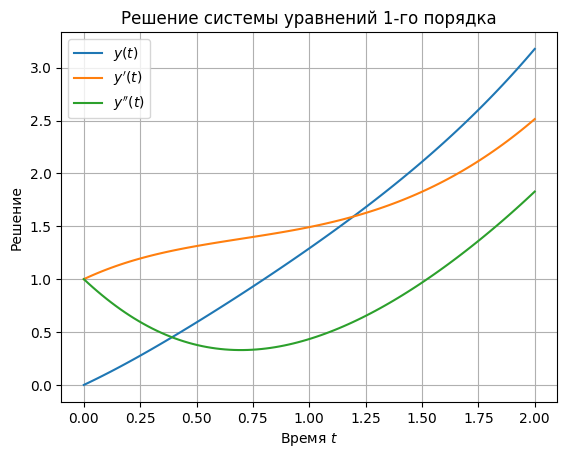

In [16]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Система ДУ 1-го порядка
def equations(t, y):
    y1, y2, y3 = y
    return [y2, y3, 2*y1 - y2 - y3]

# Начальные условия
initial_conditions = [0, 1, 1]

# Отрезок
section = [0, 2]

# Решаем систему ДУ
solution = solve_ivp(equations, section, initial_conditions, t_eval=np.linspace(0, 2, 100))

# Получаем решение
t = solution.t
y1, y2, y3 = solution.y

# Визуализация
plt.plot(t, y1, label='$y(t)$')
plt.plot(t, y2, label="$y'(t)$")
plt.plot(t, y3, label="$y''(t)$")
plt.xlabel('Время $t$')
plt.ylabel('Решение')
plt.title('Решение системы уравнений 1-го порядка')
plt.legend()
plt.grid(True)
plt.show()